<a href="https://colab.research.google.com/github/vidyaana22/portofolio-dataanalyst/blob/main/Clustering%20on%20Automobile%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Dataset : https://www.kaggle.com/datasets/toramky/automobile-dataset

# **Data Wrangling**

In [ ]:
#import the libraries
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Python library for Vidualization
import scipy.cluster.hierarchy as sch # Hierarchical clustering, dendogram

In [ ]:
# Import data harga rumah kota ('data.csv')
df = pd.read_excel('Automobile_data.xlsx')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106.0,4800,26,27,22470.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# **Identifikasi Data Duplikat**

In [ ]:
pd.DataFrame(data = [df.duplicated().sum()],
             index=["Data duplicates"]).T.style.background_gradient(cmap='YlOrRd')

,Data duplicates
0,0


Tidak ada data yang duplikat

# **Identifikasi Missing Value**

In [ ]:
# Missing values computation
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           2
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64


Terdapat missing value di variabel horsepower dan price

In [ ]:
#Menghapus missing value
df = df.dropna()

In [ ]:
#Menampilkan dataset setelah dihapus missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

Terlihat bahwa jumlah observasi berkurang dari yang awalnya 205 menjadi 199

# **Identifikasi Outlier**

In [ ]:
def num_plot(data, feature, target):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    #plot histogram and box plot for the numerical variables
    sns.histplot(data=data, x=feature, hue=target, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=feature, ax=ax[1])
    ax[0].set_title(f"{feature} Distribution Histogram")
    ax[1].set_title(f"{feature} Distribution Boxplot")

    plt.show()

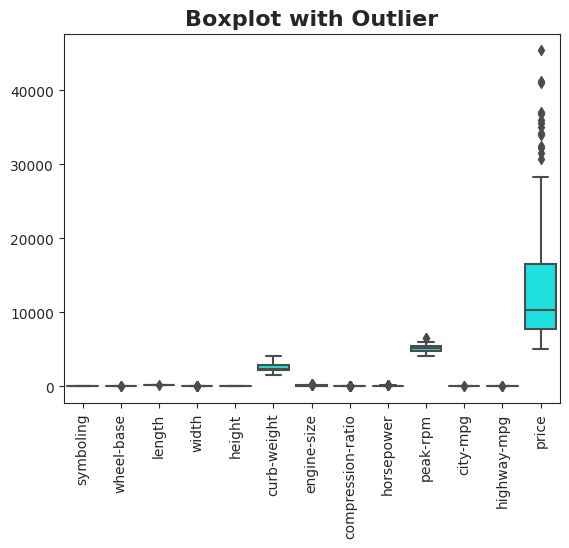

In [ ]:
# menetapkan style plotting seaborn
sns.set_style("ticks")

# membuat boxplot
sns.boxplot(data=df, color="cyan")

# menambahkan judul
plt.title("Boxplot with Outlier", fontsize=16, fontweight='bold')

# memperbaiki penamaan x-axis agar vertikal
plt.xticks(rotation=90)

# menampilkan plot
plt.show()

In [ ]:
#Menghapus data outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-10-e2a167f93eda>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-10-e2a167f93eda>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-10-e2a167f93eda>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


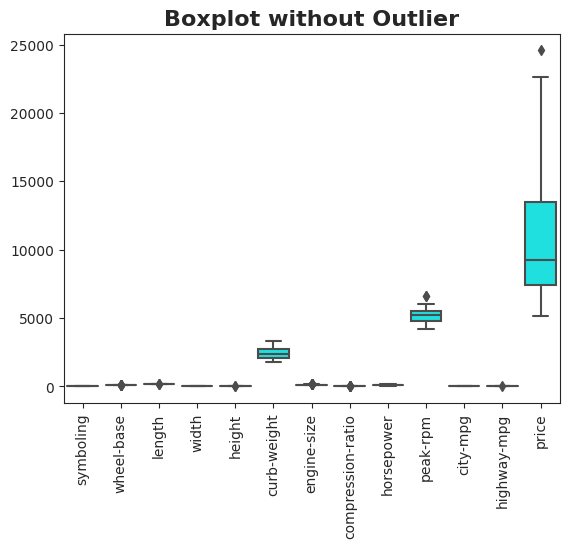

In [ ]:
# menetapkan style plotting seaborn
sns.set_style("ticks")

# membuat boxplot
sns.boxplot(data=df, color="cyan")

# menambahkan judul
plt.title("Boxplot without Outlier", fontsize=16, fontweight='bold')

# memperbaiki penamaan x-axis agar vertikal
plt.xticks(rotation=90)

# menampilkan plot
plt.show()

In [ ]:
#Menampilkan dataset setelah dihapus outliernya
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          154 non-null    int64  
 1   normalized-losses  154 non-null    object 
 2   make               154 non-null    object 
 3   fuel-type          154 non-null    object 
 4   aspiration         154 non-null    object 
 5   num-of-doors       154 non-null    object 
 6   body-style         154 non-null    object 
 7   drive-wheels       154 non-null    object 
 8   engine-location    154 non-null    object 
 9   wheel-base         154 non-null    float64
 10  length             154 non-null    float64
 11  width              154 non-null    float64
 12  height             154 non-null    float64
 13  curb-weight        154 non-null    int64  
 14  engine-type        154 non-null    object 
 15  num-of-cylinders   154 non-null    object 
 16  engine-size        154 non

Terlihat bahwa jumlah observasi berkurang dari yang awalnya 199 setelah dihapus missing value dan sekarang menjadi 154 setelah dihapus outlier

# Clustering

In [ ]:
df_baru = df[["symboling","horsepower","highway-mpg","price"]]

In [ ]:
df_baru.head()

,symboling,horsepower,highway-mpg,price
0,3,111.0,27,13495.0
1,3,111.0,27,16500.0
2,1,154.0,26,16500.0
3,2,102.0,30,13950.0
4,2,115.0,22,17450.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

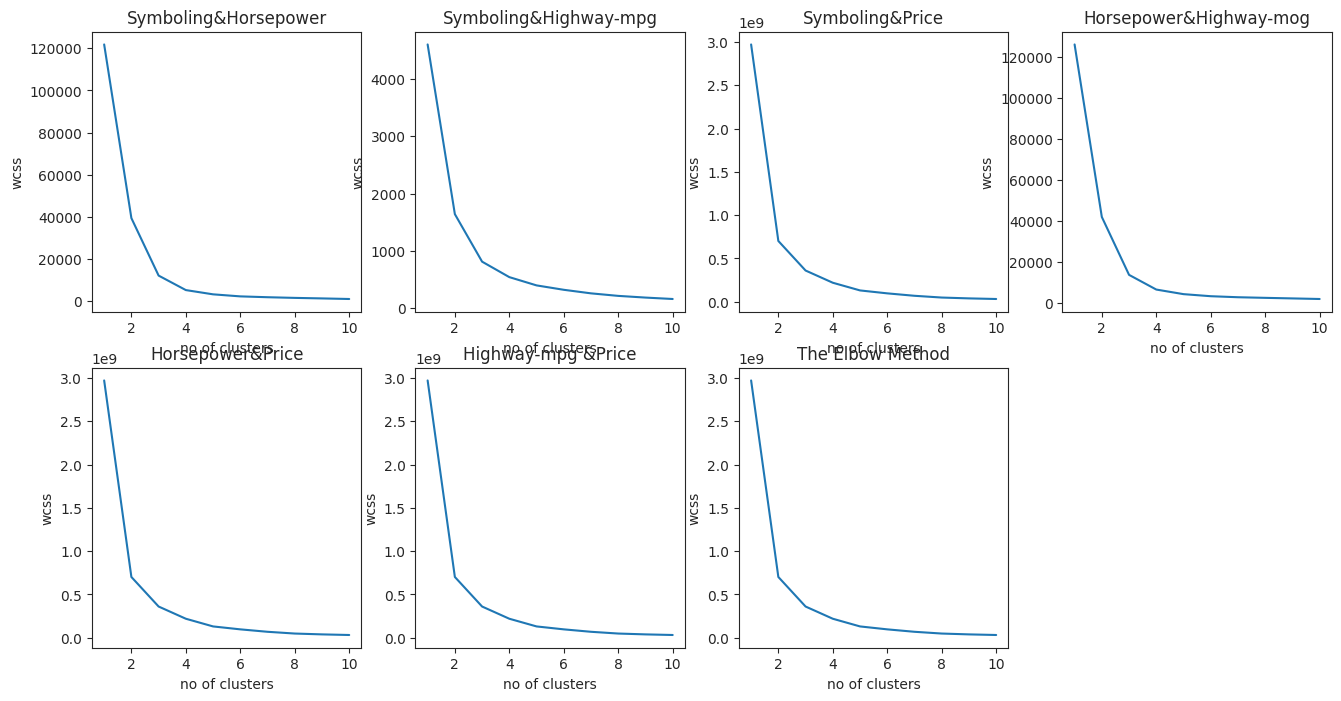

In [ ]:
# Feature selection for the model
# Considering only 2 features (Annual income and Spending Score) and no Label availa
X1 = df_baru.iloc[:, [0,1]].values
X2 = df_baru.iloc[:, [0,2]].values
X3 = df_baru.iloc[:, [0,3]].values
Y1 = df_baru.iloc[:, [1,2]].values
Y2 = df_baru.iloc[:, [1,3]].values
Z = df_baru.iloc[:, [2,3]].values
All = df_baru.values

# Building the Model
# KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmeth
# To figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss1 = []
wcss2 = []
wcss3 = []
wcss4 = []
wcss5 = []
wcss6 = []
wcss7 = []

# We always assume the max number of cluster would be 10
# You can judge the number of clusters by doing averaging
# Static code to get max no of clusters
for i in range(1,11):
 kmeans1 = KMeans(n_clusters= i, init='k-means++', random_state=0)
 kmeans1.fit(X1)
 wcss1.append(kmeans1.inertia_)

for i in range(1,11):
 kmeans2 = KMeans(n_clusters= i, init='k-means++', random_state=0)
 kmeans2.fit(X2)
 wcss2.append(kmeans2.inertia_)

for i in range(1,11):
 kmeans3 = KMeans(n_clusters= i, init='k-means++', random_state=0)
 kmeans3.fit(X3)
 wcss3.append(kmeans3.inertia_)

for i in range(1,11):
 kmeans4 = KMeans(n_clusters= i, init='k-means++', random_state=0)
 kmeans4.fit(Y1)
 wcss4.append(kmeans4.inertia_)

for i in range(1,11):
 kmeans5 = KMeans(n_clusters= i, init='k-means++', random_state=0)
 kmeans5.fit(Y2)
 wcss5.append(kmeans5.inertia_)

for i in range(1,11):
 kmeans6 = KMeans(n_clusters= i, init='k-means++', random_state=0)
 kmeans6.fit(Z)
 wcss6.append(kmeans6.inertia_)

for i in range(1,11):
 kmeans7 = KMeans(n_clusters= i, init='k-means++', random_state=0)
 kmeans7.fit(All)
 wcss7.append(kmeans7.inertia_)

# Inertia_ is the formula used to segregate the data points into clusters

import matplotlib.pyplot as plt
import numpy as np

# Membuat subplots dalam bentuk matrix (2,4)
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

# Menambahkan plot ke setiap subplot
axs[0,0].plot(range(1,11), wcss1)
axs[0,0].set_title('Symboling&Horsepower')
axs[0,0].set_xlabel('no of clusters')
axs[0,0].set_ylabel('wcss')

axs[0,1].plot(range(1,11), wcss2)
axs[0,1].set_title('Symboling&Highway-mpg')
axs[0,1].set_xlabel('no of clusters')
axs[0,1].set_ylabel('wcss')

axs[0,2].plot(range(1,11), wcss3)
axs[0,2].set_title('Symboling&Price')
axs[0,2].set_xlabel('no of clusters')
axs[0,2].set_ylabel('wcss')

axs[0,3].plot(range(1,11), wcss4)
axs[0,3].set_title('Horsepower&Highway-mog')
axs[0,3].set_xlabel('no of clusters')
axs[0,3].set_ylabel('wcss')

axs[1,0].plot(range(1,11), wcss5)
axs[1,0].set_title('Horsepower&Price')
axs[1,0].set_xlabel('no of clusters')
axs[1,0].set_ylabel('wcss')

axs[1,1].plot(range(1,11), wcss6)
axs[1,1].set_title('Highway-mpg &Price')
axs[1,1].set_xlabel('no of clusters')
axs[1,1].set_ylabel('wcss')

axs[1,2].plot(range(1,11), wcss7)
axs[1,2].set_title('The Elbow Method')
axs[1,2].set_xlabel('no of clusters')
axs[1,2].set_ylabel('wcss')

# Menghapus subplot yang tidak terpakai
axs[1,3].axis('off')

plt.show()

In [ ]:
# Model Build
kmeansmodel1 = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans1= kmeansmodel1.fit_predict(X1)

# Model Build
kmeansmodel2 = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans2= kmeansmodel2.fit_predict(X2)

# Model Build
kmeansmodel3 = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans3= kmeansmodel3.fit_predict(X3)

# Model Build
kmeansmodel4 = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans4= kmeansmodel4.fit_predict(Y1)

# Model Build
kmeansmodel5 = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans5= kmeansmodel5.fit_predict(Y2)

# Model Build
kmeansmodel6 = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans6= kmeansmodel6.fit_predict(Z)

# Model Build
kmeansmodel7 = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans7= kmeansmodel7.fit_predict(All)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(y_kmeans1)

print(y_kmeans2)

print(y_kmeans3)

print(y_kmeans4)

print(y_kmeans5)

print(y_kmeans6)

print(y_kmeans7)

[1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 1 2 0 0 0 0 0 1 2 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2
 2 2 2 1 1 1 1 1 0 1 0 0 0 0 2 1 1 1 1 2 2 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 1 0 0 1 0 1 1 1 1
 2 2 1 2 2 1]
[2 2 2 1 2 2 1 1 1 1 2 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 2 2 2 2 1 1 1 1 1 2 2 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 2 2
 2 2 2 2 2 2 2 2 0 1 0 0 0 1 2 1 1 1 1 2 2 0 1 1 0 1 1 2 1 1 1 1 2 0 0 0 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1
 2 2 1 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 1]
[0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2

<ipython-input-18-70c9c511118e>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0, 0].scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], c = 'red', label = 'Cluster 1',cmap = 'rainbow')
<ipython-input-18-70c9c511118e>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0, 0].scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], c = 'blue', label = 'Cluster 2',cmap = 'rainbow')
<ipython-input-18-70c9c511118e>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0, 0].scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], c = 'green', label = 'Cluster 3',cmap = 'rainbow')
<ipython-input-18-70c9c511118e>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[0, 0].scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids',cmap = 'rainbow')
<ipython-input-1

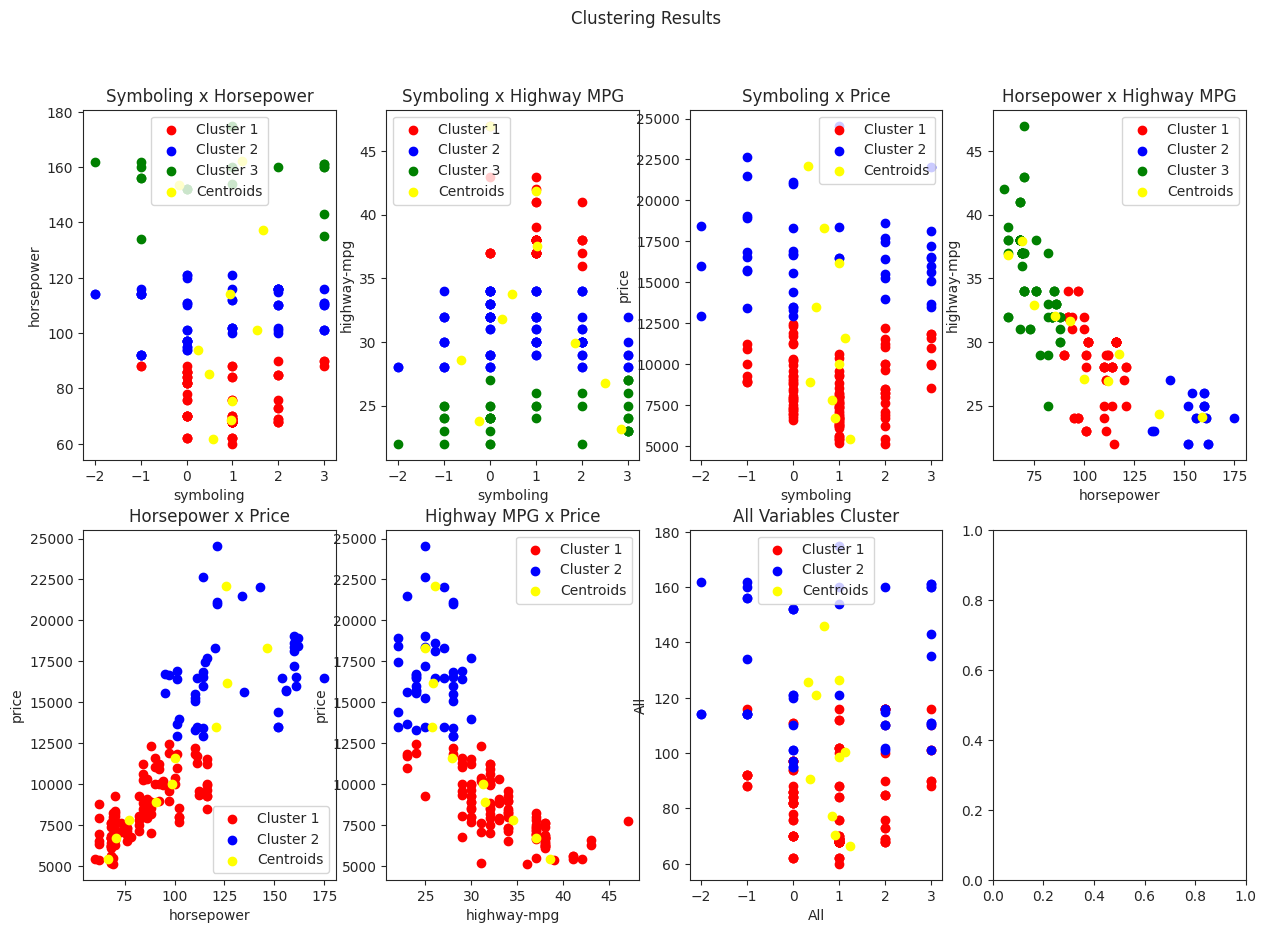

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Clustering Results')

# Cluster 1
axs[0, 0].scatter(X1[y_kmeans1 == 0, 0], X1[y_kmeans1 == 0, 1], c = 'red', label = 'Cluster 1',cmap = 'rainbow')
axs[0, 0].scatter(X1[y_kmeans1 == 1, 0], X1[y_kmeans1 == 1, 1], c = 'blue', label = 'Cluster 2',cmap = 'rainbow')
axs[0, 0].scatter(X1[y_kmeans1 == 2, 0], X1[y_kmeans1 == 2, 1], c = 'green', label = 'Cluster 3',cmap = 'rainbow')
axs[0, 0].scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids',cmap = 'rainbow')
axs[0, 0].set_title('Symboling x Horsepower')
axs[0, 0].set_xlabel('symboling')
axs[0, 0].set_ylabel('horsepower')
axs[0, 0].legend()

# Cluster 2
axs[0, 1].scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 1], c = 'red', label = 'Cluster 1',cmap = 'rainbow')
axs[0, 1].scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 1], c = 'blue', label = 'Cluster 2',cmap = 'rainbow')
axs[0, 1].scatter(X2[y_kmeans2 == 2, 0], X2[y_kmeans2 == 2, 1], c = 'green', label = 'Cluster 3',cmap = 'rainbow')
axs[0, 1].scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids',cmap = 'rainbow')
axs[0, 1].set_title('Symboling x Highway MPG')
axs[0, 1].set_xlabel('symboling')
axs[0, 1].set_ylabel('highway-mpg')
axs[0, 1].legend()


# Cluster 3
axs[0, 2].scatter(X3[y_kmeans3 == 0, 0], X3[y_kmeans3 == 0, 1], c = 'red', label = 'Cluster 1',cmap = 'rainbow')
axs[0, 2].scatter(X3[y_kmeans3 == 1, 0], X3[y_kmeans3 == 1, 1], c = 'blue', label = 'Cluster 2',cmap = 'rainbow')
axs[0, 2].scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids',cmap = 'rainbow')
axs[0, 2].set_title('Symboling x Price')
axs[0, 2].set_xlabel('symboling')
axs[0, 2].set_ylabel('price')
axs[0, 2].legend()


# Cluster 4
axs[0, 3].scatter(Y1[y_kmeans4 == 0, 0], Y1[y_kmeans4 == 0, 1], c = 'red', label = 'Cluster 1',cmap = 'rainbow')
axs[0, 3].scatter(Y1[y_kmeans4 == 1, 0], Y1[y_kmeans4 == 1, 1], c = 'blue', label = 'Cluster 2',cmap = 'rainbow')
axs[0, 3].scatter(Y1[y_kmeans4 == 2, 0], Y1[y_kmeans4 == 2, 1], c = 'green', label = 'Cluster 3',cmap = 'rainbow')
axs[0, 3].scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids',cmap = 'rainbow')
axs[0, 3].set_title('Horsepower x Highway MPG')
axs[0, 3].set_xlabel('horsepower')
axs[0, 3].set_ylabel('highway-mpg')
axs[0, 3].legend()


# Cluster 5
axs[1, 0].scatter(Y2[y_kmeans5 == 0, 0], Y2[y_kmeans5 == 0, 1], c = 'red', label = 'Cluster 1',cmap = 'rainbow')
axs[1, 0].scatter(Y2[y_kmeans5 == 1, 0], Y2[y_kmeans5 == 1, 1], c = 'blue', label = 'Cluster 2',cmap = 'rainbow')
axs[1, 0].scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids',cmap = 'rainbow')
axs[1, 0].set_title('Horsepower x Price')
axs[1, 0].set_xlabel('horsepower')
axs[1, 0].set_ylabel('price')
axs[1, 0].legend()


# Cluster 6
axs[1, 1].scatter(Z[y_kmeans6 == 0, 0], Z[y_kmeans6 == 0, 1], c = 'red', label = 'Cluster 1',cmap = 'rainbow')
axs[1, 1].scatter(Z[y_kmeans6 == 1, 0], Z[y_kmeans6 == 1, 1], c = 'blue', label = 'Cluster 2',cmap = 'rainbow')
axs[1, 1].scatter(kmeans6.cluster_centers_[:, 0], kmeans6.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids',cmap = 'rainbow')
axs[1, 1].set_title('Highway MPG x Price')
axs[1, 1].set_xlabel('highway-mpg')
axs[1, 1].set_ylabel('price')
axs[1, 1].legend()


# Cluster 7
axs[1, 2].scatter(All[y_kmeans7 == 0, 0], All[y_kmeans7 == 0, 1], c = 'red', label = 'Cluster 1',cmap = 'rainbow')
axs[1, 2].scatter(All[y_kmeans7 == 1, 0], All[y_kmeans7 == 1, 1], c = 'blue', label = 'Cluster 2',cmap = 'rainbow')
axs[1, 2].scatter(kmeans7.cluster_centers_[:, 0], kmeans7.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids',cmap = 'rainbow')
axs[1, 2].set_title('All Variables Cluster')
axs[1, 2].set_xlabel('All')
axs[1, 2].set_ylabel('All')
axs[1, 2].legend()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# select features
df_baru = df[["symboling","horsepower","highway-mpg","price"]]

# define the number of clusters
k = 2

# create k-means object
kmeans = KMeans(n_clusters=k)

# fit k-means object to data
kmeans.fit(df_baru)

# print cluster labels
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-20-49874020054c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['Category']= kmeans.labels_


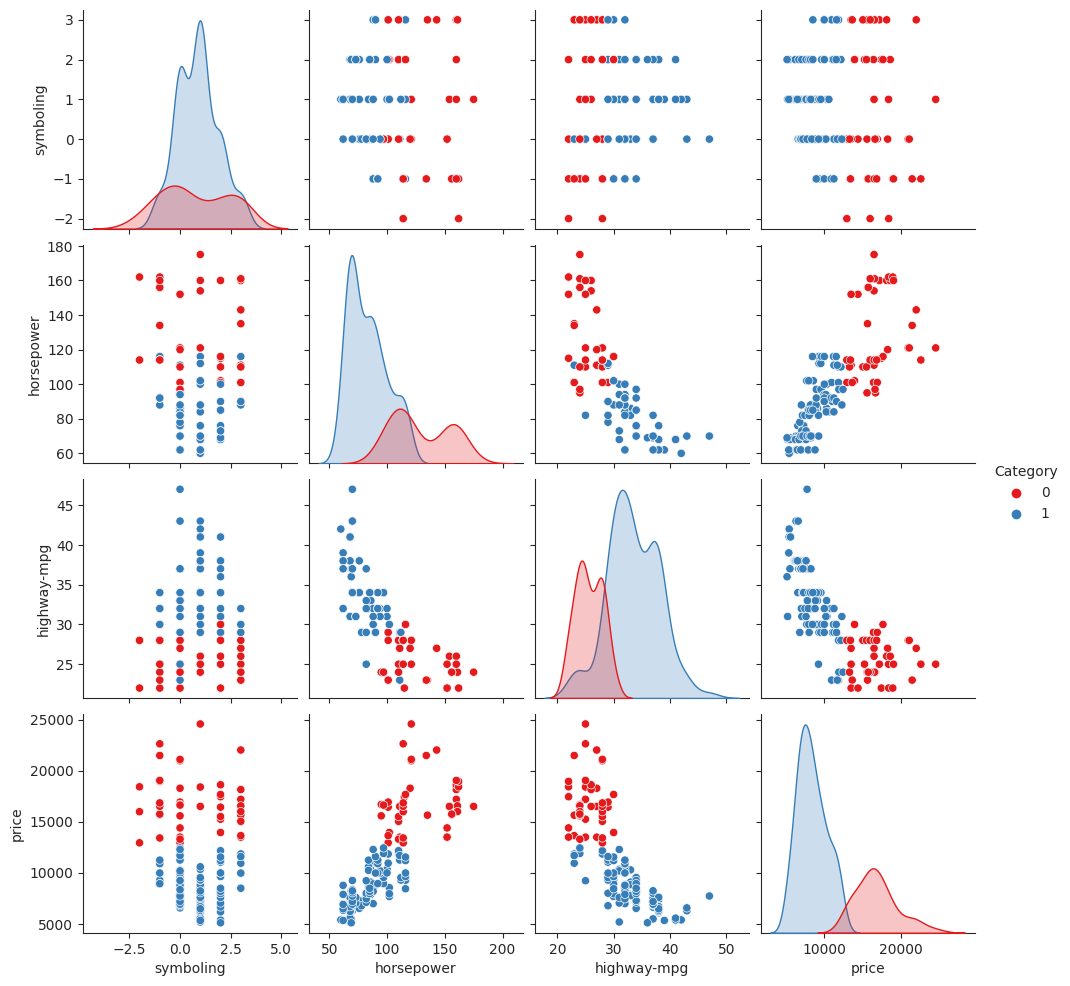

In [ ]:
df_baru['Category']= kmeans.labels_

sns.pairplot(data = df_baru,hue='Category', palette = "Set1")

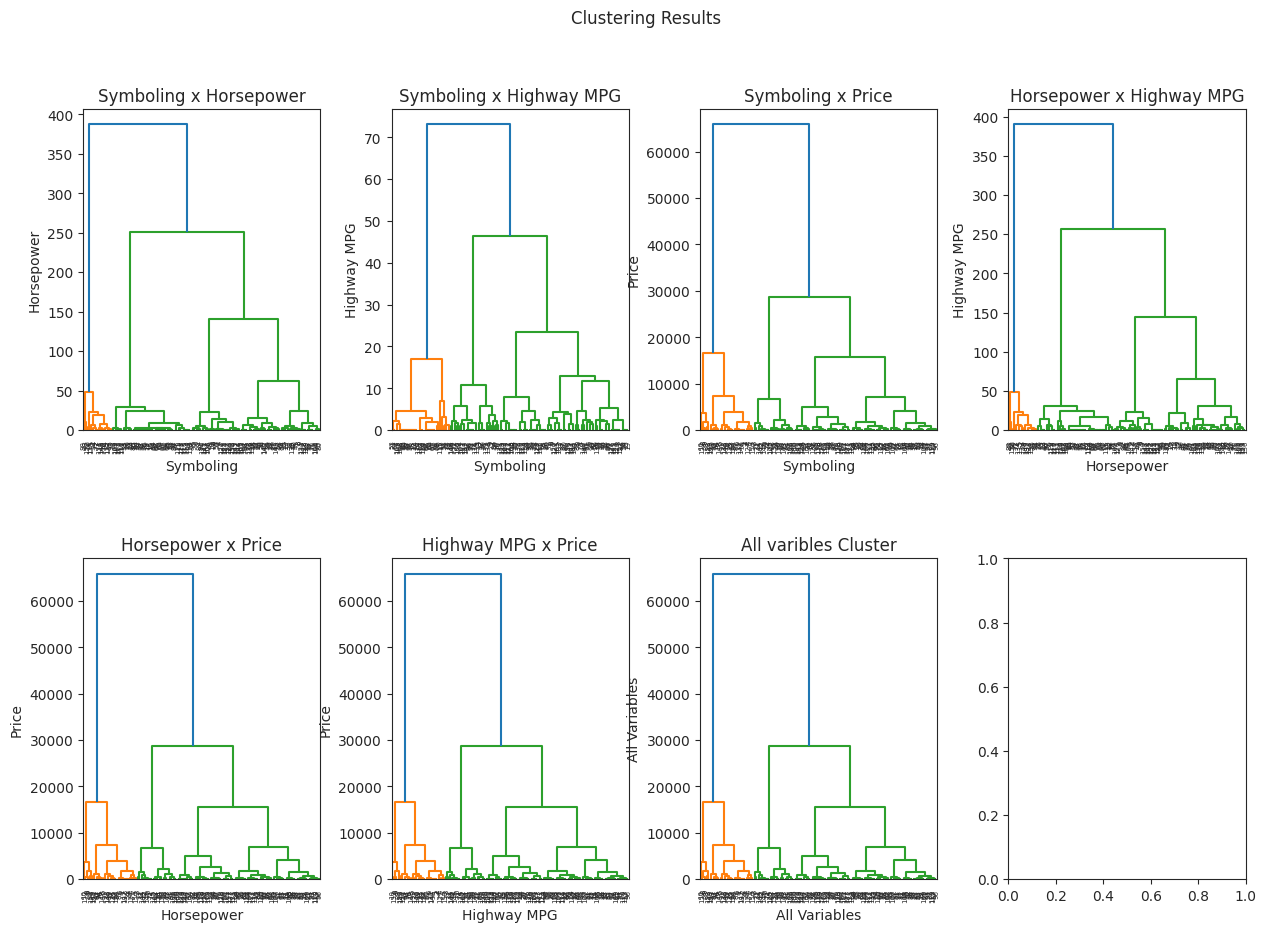

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Define your data variables X1, X2, ..., All here

# Create a figure with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
# Set the overall title of the figure
fig.suptitle('Clustering Results')

# Plot dendrogram for X1
dendrogram1 = sch.dendrogram(sch.linkage(X1, method='ward'), ax=axs[0, 0])
axs[0, 0].set_title('Symboling x Horsepower')
axs[0, 0].set_xlabel('Symboling')
axs[0, 0].set_ylabel('Horsepower')

# Plot dendrogram for X2
dendrogram2 = sch.dendrogram(sch.linkage(X2, method='ward'), ax=axs[0, 1])
axs[0, 1].set_title('Symboling x Highway MPG')
axs[0, 1].set_xlabel('Symboling')
axs[0, 1].set_ylabel('Highway MPG')

# Plot dendrogram for X3
dendrogram3 = sch.dendrogram(sch.linkage(X3, method='ward'), ax=axs[0, 2])
axs[0, 2].set_title('Symboling x Price')
axs[0, 2].set_xlabel('Symboling')
axs[0, 2].set_ylabel('Price')

# Plot dendrogram for Y1
dendrogram4 = sch.dendrogram(sch.linkage(Y1, method='ward'), ax=axs[0, 3])
axs[0, 3].set_title('Horsepower x Highway MPG')
axs[0, 3].set_xlabel('Horsepower')
axs[0, 3].set_ylabel('Highway MPG')

# Plot dendrogram for Y2
dendrogram5 = sch.dendrogram(sch.linkage(Y2, method='ward'), ax=axs[1, 0])
axs[1, 0].set_title('Horsepower x Price')
axs[1, 0].set_xlabel('Horsepower')
axs[1, 0].set_ylabel('Price')

# Plot dendrogram for Z
dendrogram6 = sch.dendrogram(sch.linkage(Z, method='ward'), ax=axs[1, 1])
axs[1, 1].set_title('Highway MPG x Price')
axs[1, 1].set_xlabel('Highway MPG')
axs[1, 1].set_ylabel('Price')

# Plot dendrogram for All
dendrogram7 = sch.dendrogram(sch.linkage(All, method='ward'), ax=axs[1, 2])
axs[1, 2].set_title('All varibles Cluster')
axs[1, 2].set_xlabel('All Variables')
axs[1, 2].set_ylabel('All Variables')

# Remove the legend from all subplots
for ax in axs.flatten():
    ax.legend().remove()

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)
